# Prediction on Revenue Decline for Portuguese Banking Institution

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Bank.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns = ['Age', 'Job','Marital','Education','Default','Housing','Loan','Contact_type','Month','Day_of_week','Duration','Campaign','No_of_days_passed','Previous_contacts_performed','Outcome','Variation_rate','Price_index','Confidence_index','Three_month_rate','No_of_employees','Subscription_Deposit']

In [5]:
data.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact_type,Month,Day_of_week,...,Campaign,No_of_days_passed,Previous_contacts_performed,Outcome,Variation_rate,Price_index,Confidence_index,Three_month_rate,No_of_employees,Subscription_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data['Job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Job, dtype: int64

In [7]:
def remove_whitespace(x):
    if isinstance(x, basestring):
        return x.strip()
    else:
        return x
my_data = data.applymap(remove_whitespace)

In [8]:
def remove_letter(x):
    if isinstance(x, basestring):
        return x.lower()
    else:
        return x
my_data = my_data.applymap(remove_letter)

In [9]:
data.isnull().sum()

Age                            0
Job                            0
Marital                        0
Education                      0
Default                        0
Housing                        0
Loan                           0
Contact_type                   0
Month                          0
Day_of_week                    0
Duration                       0
Campaign                       0
No_of_days_passed              0
Previous_contacts_performed    0
Outcome                        0
Variation_rate                 0
Price_index                    0
Confidence_index               0
Three_month_rate               0
No_of_employees                0
Subscription_Deposit           0
dtype: int64

In [10]:
data['Job'] = data['Job'].replace('unknown',np.nan)
data['Marital'] = data['Marital'].replace('unknown',np.nan)
data['Education'] = data['Education'].replace('unknown',np.nan)
data['Default'] = data['Default'].replace('unknown',np.nan)
data['Housing'] = data['Housing'].replace('unknown',np.nan)
data['Loan'] = data['Loan'].replace('unknown',np.nan)

In [11]:
data.fillna(method='ffill',inplace = True)

## Data Exploration

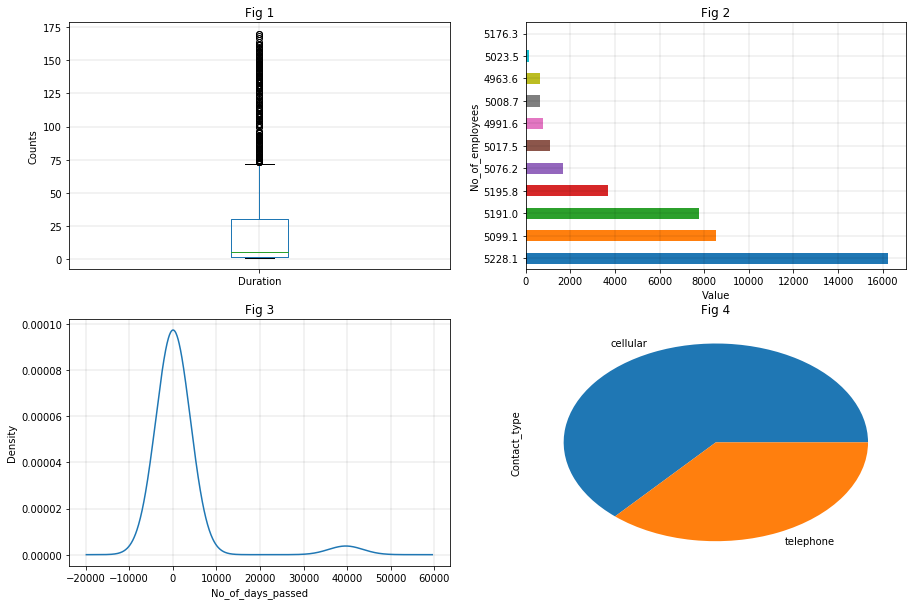

In [12]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 2, 1) 
data['Duration'].value_counts().plot(kind = 'box')
plt.ylabel("Counts")
plt.title("Fig 1")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.subplot(2, 2, 2) 
data['No_of_employees'].value_counts().plot(kind = 'barh')
plt.xlabel("Value")
plt.ylabel("No_of_employees")
plt.title("Fig 2")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.subplot(2, 2, 3)
data['No_of_days_passed'].value_counts().plot(kind = 'density')
plt.xlabel("No_of_days_passed")
plt.title("Fig 3")
plt.grid(color='black', linestyle='-', linewidth=0.1)


plt.subplot(2, 2, 4)  
data['Contact_type'].value_counts().plot(kind = 'pie')
plt.title("Fig 4")

plt.show();

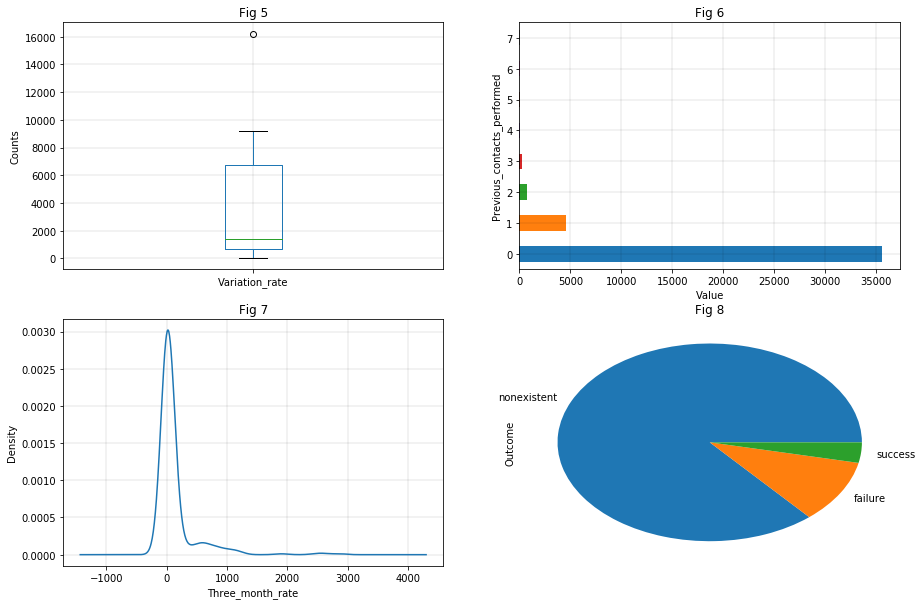

In [13]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 2, 1) 
data['Variation_rate'].value_counts().plot(kind = 'box')
plt.ylabel("Counts")
plt.title("Fig 5")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.subplot(2, 2, 2) 
data['Previous_contacts_performed'].value_counts().plot(kind = 'barh')
plt.xlabel("Value")
plt.ylabel("Previous_contacts_performed")
plt.title("Fig 6")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.subplot(2, 2, 3)
data['Three_month_rate'].value_counts().plot(kind = 'density')
plt.xlabel("Three_month_rate")
plt.title("Fig 7")
plt.grid(color='black', linestyle='-', linewidth=0.1)


plt.subplot(2, 2, 4) 
data['Outcome'].value_counts().plot(kind = 'pie')
plt.title("Fig 8")

plt.show();

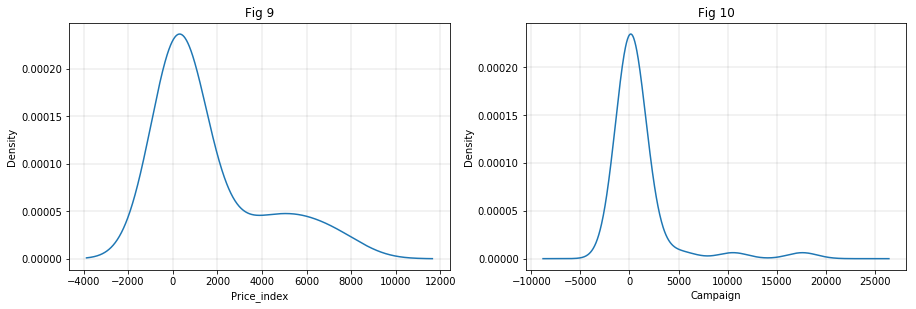

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 2, 1) 
data['Price_index'].value_counts().plot(kind = 'density')
plt.xlabel("Price_index")
plt.title("Fig 9")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.subplot(2, 2, 2) 
data['Campaign'].value_counts().plot(kind = 'density')
plt.xlabel("Campaign")
plt.title("Fig 10")
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.show();

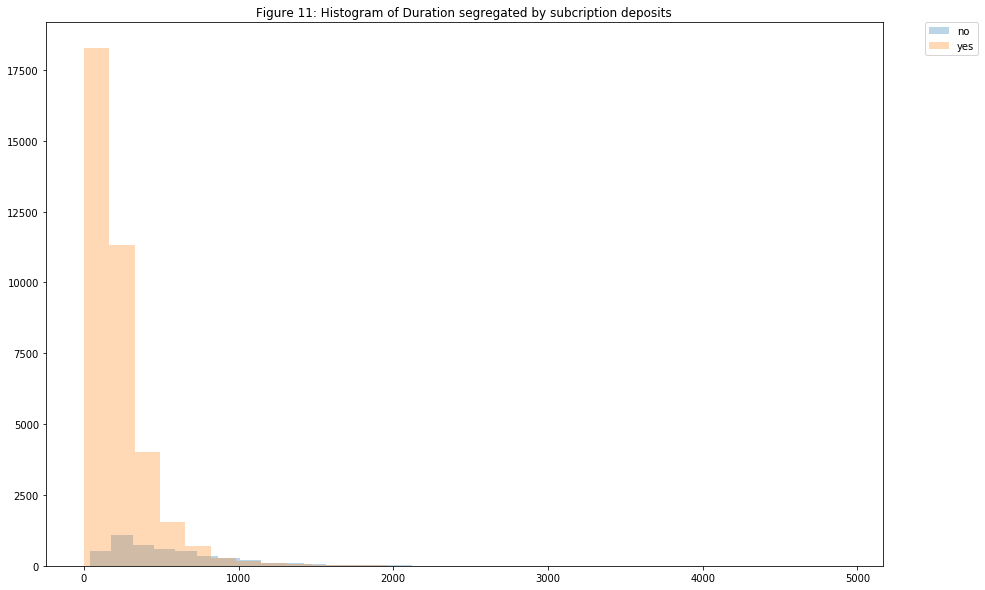

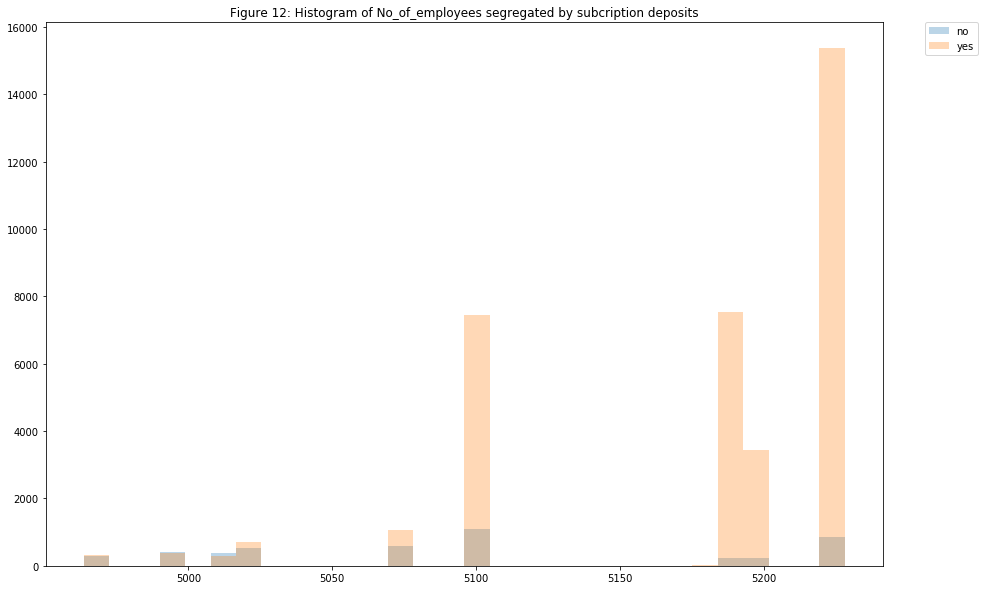

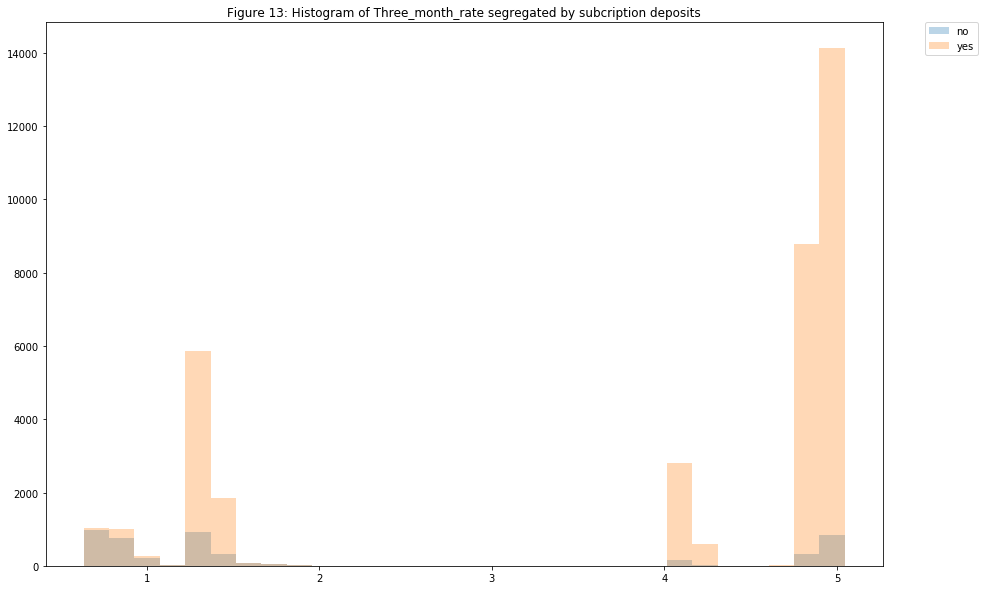

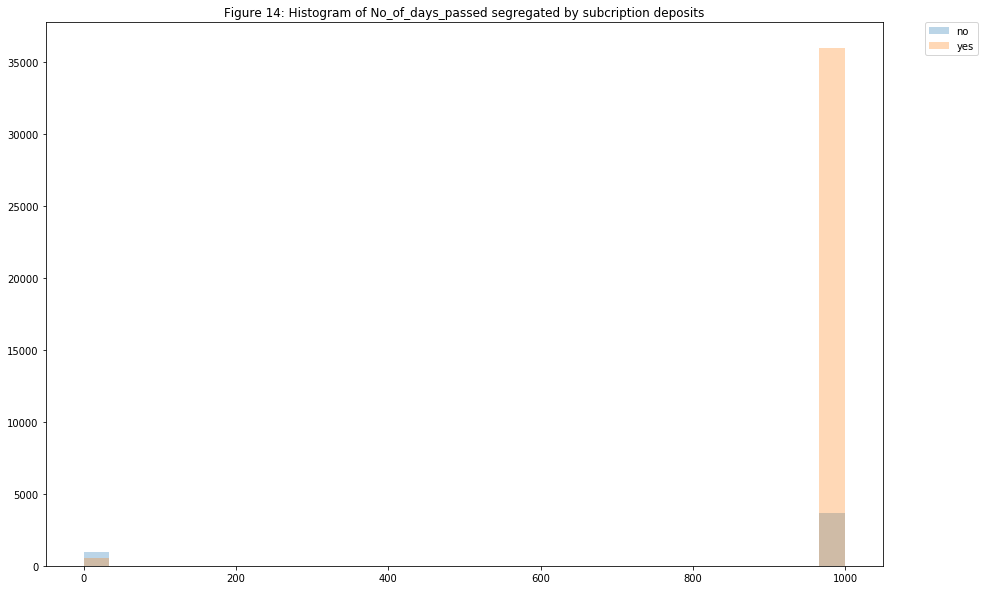

In [15]:
i=11

for col in ['Duration', 'No_of_employees', 'Three_month_rate', 'No_of_days_passed']:
   
    data1 = data.loc[data['Subscription_Deposit']=="yes", col]
    data2 = data.loc[data['Subscription_Deposit']=="no", col]
    
    plt.hist(data1, alpha = 0.3, bins = 30)
    plt.hist(data2, alpha = 0.3, bins = 30)
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by subcription deposits")
    i = i + 1
    plt.legend(data['Subscription_Deposit'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

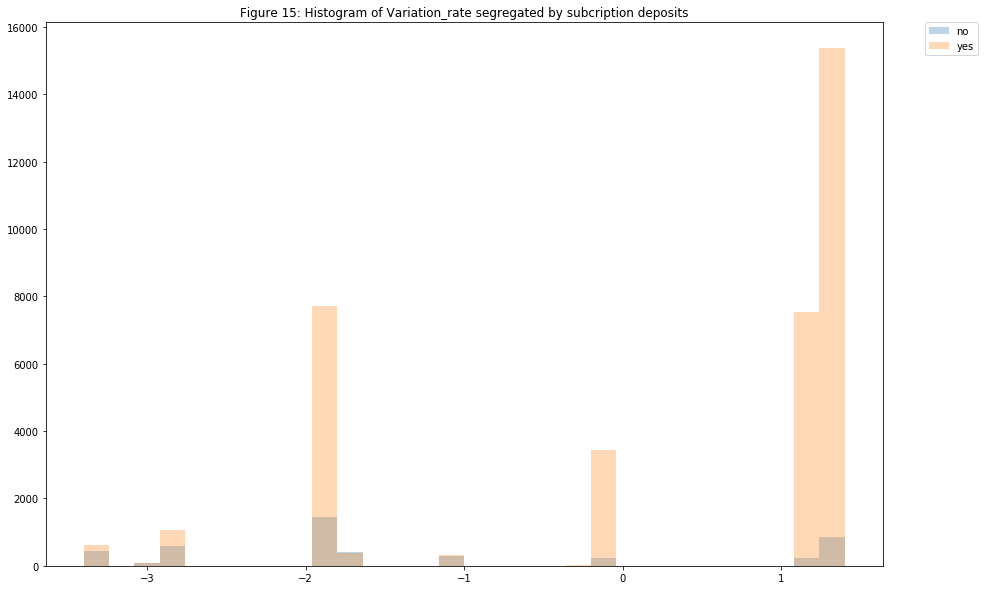

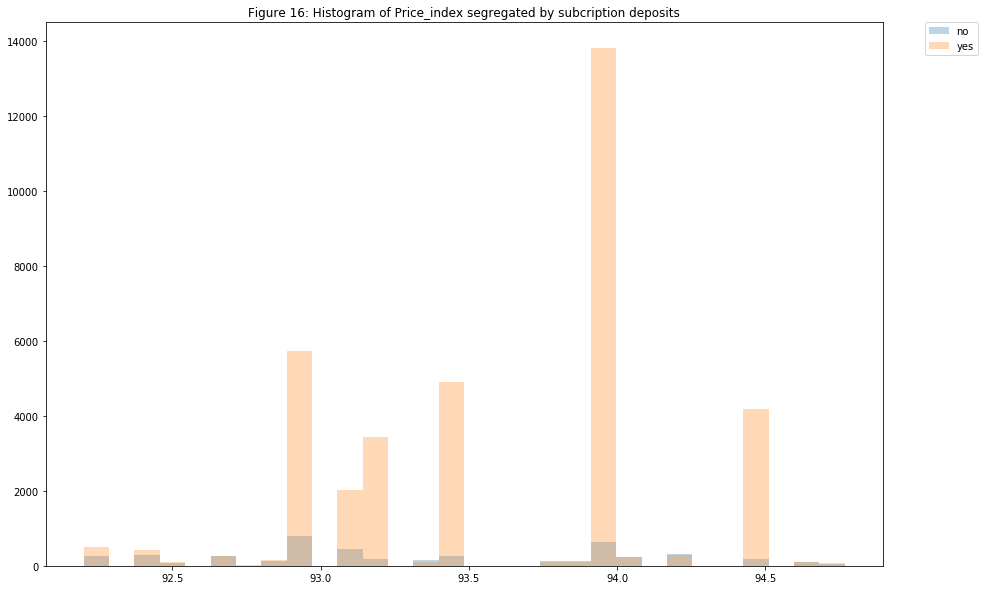

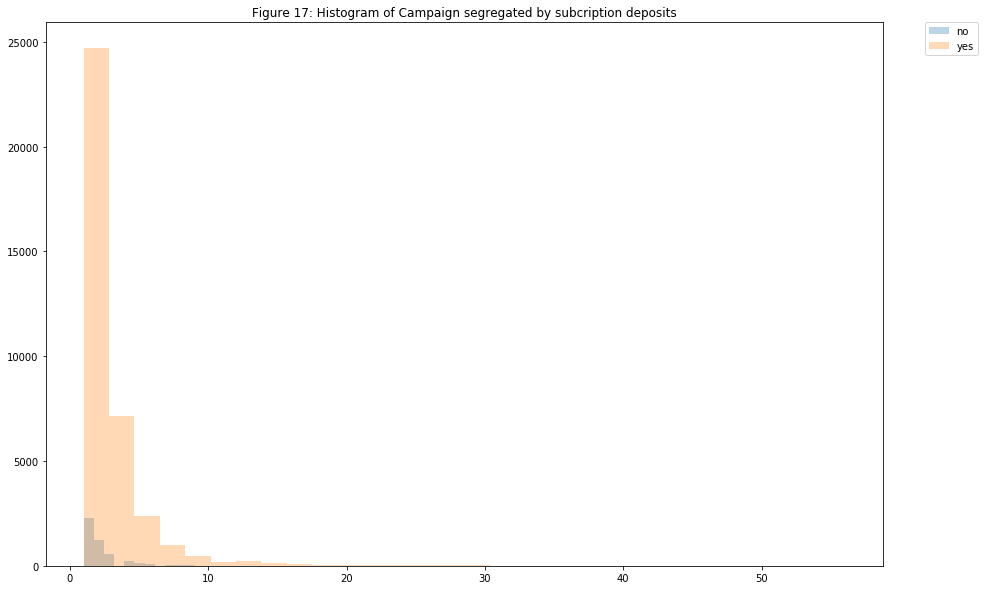

In [16]:
i=15
for col in ['Variation_rate', 'Price_index', 'Campaign']:
    data1 = data.loc[data['Subscription_Deposit']=="yes", col]
    data2 = data.loc[data['Subscription_Deposit']=="no", col]
    plt.hist(data1, alpha = 0.3, bins = 30)
    plt.hist(data2, alpha = 0.3, bins = 30)
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by subcription deposits")
    i = i + 1
    plt.legend(data['Subscription_Deposit'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

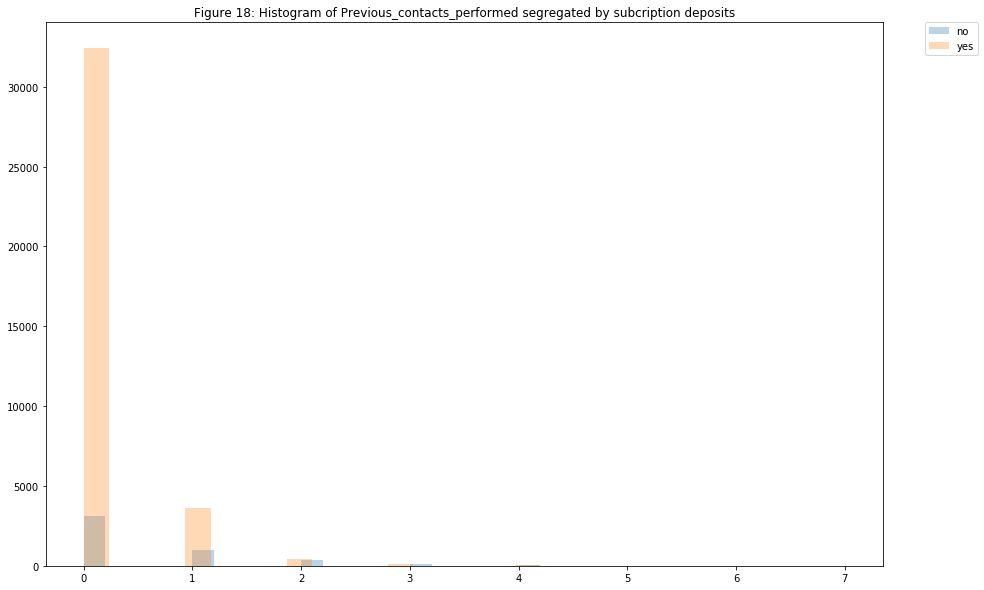

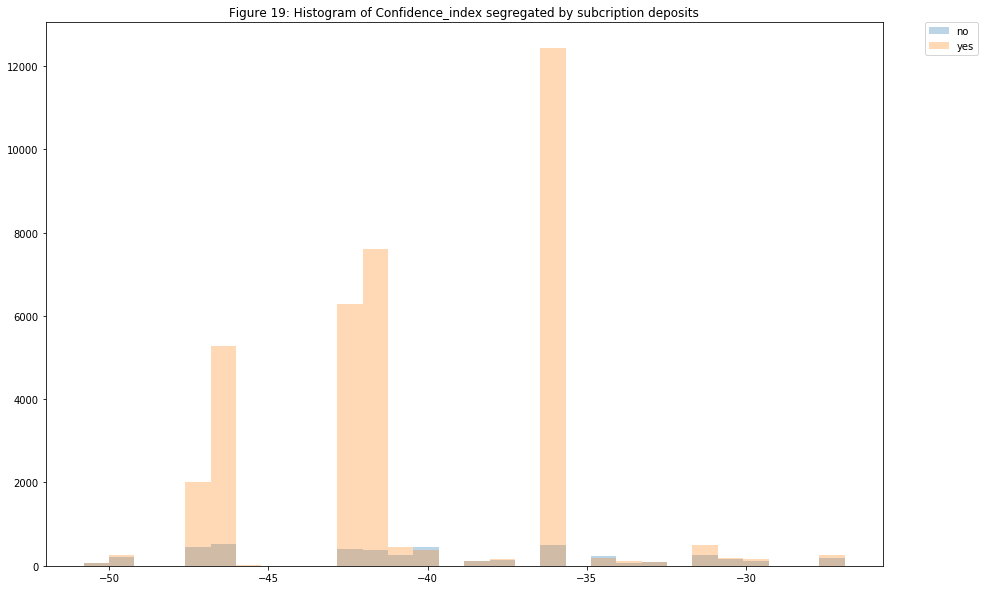

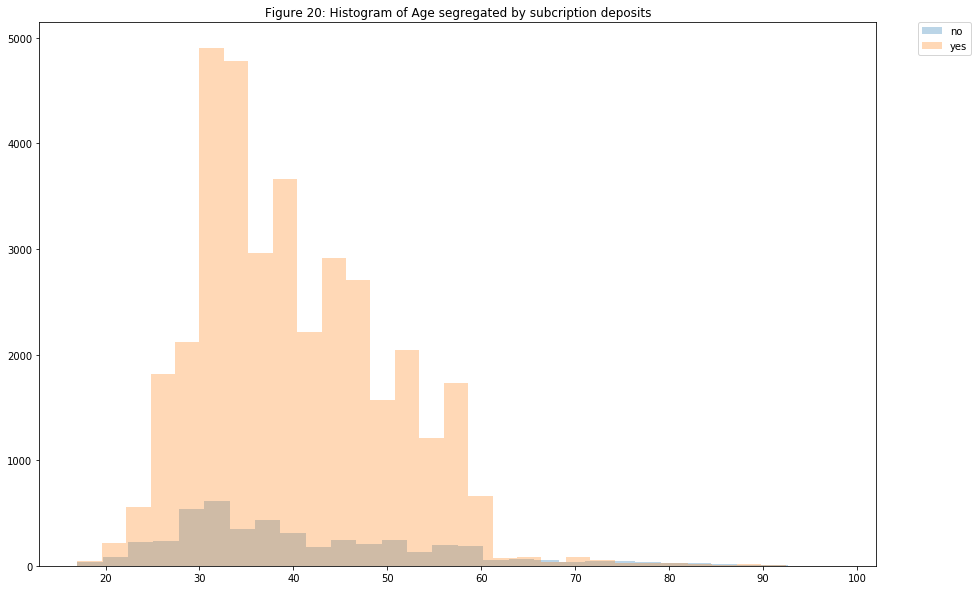

In [17]:
i=18
for col in ['Previous_contacts_performed','Confidence_index','Age']:
    data1 = data.loc[data['Subscription_Deposit']=="yes", col]
    data2 = data.loc[data['Subscription_Deposit']=="no", col]
    plt.hist(data1, alpha = 0.3, bins = 30)
    plt.hist(data2, alpha = 0.3, bins = 30)
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by subcription deposits")
    i = i + 1
    plt.legend(data['Subscription_Deposit'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## Data modeling

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
le_fit = le.fit(data['Job'])
data['Job'] = le_fit.transform(data['Job'])

le_fit = le.fit(data['Marital'])
data['Marital'] = le_fit.transform(data['Marital'])


le_fit = le.fit(data['Education'])
data['Education'] = le_fit.transform(data['Education'])

le_fit = le.fit(data['Default'])
data['Default'] = le_fit.transform(data['Default'])

le_fit = le.fit(data['Housing'])
data['Housing'] = le_fit.transform(data['Housing'])


le_fit = le.fit(data['Loan'])
data['Loan'] = le_fit.transform(data['Loan'])

le_fit = le.fit(data['Contact_type'])
data['Contact_type'] = le_fit.transform(data['Contact_type'])

le_fit = le.fit(data['Month'])
data['Month'] = le_fit.transform(data['Month'])

le_fit = le.fit(data['Day_of_week'])
data['Day_of_week'] = le_fit.transform(data['Day_of_week'])

le_fit = le.fit(data['Outcome'])
data['Outcome'] = le_fit.transform(data['Outcome'])



In [20]:
Data_original = data.drop(columns = 'Subscription_Deposit').values
target = data['Subscription_Deposit']

le_fit = le.fit(target)
target = le_fit.transform(target)

In [21]:
target

array([0, 0, 0, ..., 0, 1, 0])

In [22]:
import numpy as np

print(type(target))
np.unique(target, return_counts = True)

<type 'numpy.ndarray'>


(array([0, 1]), array([36548,  4640], dtype=int64))

In [23]:
from sklearn import feature_selection as fs
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=10)
fs_fit_fscore.fit_transform(Data_original, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:10]
fs_indices_fscore

array([10, 19, 12, 18, 15, 13,  7, 16, 14, 11], dtype=int64)

In [24]:
best_features_fscore = data.columns[fs_indices_fscore].values
best_features_fscore

array(['Duration', 'No_of_employees', 'No_of_days_passed',
       'Three_month_rate', 'Variation_rate',
       'Previous_contacts_performed', 'Contact_type', 'Price_index',
       'Outcome', 'Campaign'], dtype=object)

In [25]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([8094.10163446, 5926.61060111, 4861.17327205, 4309.47904811,
       4023.82992549, 2304.25708794,  881.70707031,  778.58979485,
        705.67816444,  182.15667288])

### 80:20 Split

#### KNN

In [26]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = \
    train_test_split(Data_original, target, test_size = 0.2, 
                     stratify=target, shuffle=True, random_state=999)

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

cv_method = StratifiedKFold(n_splits=5, random_state=999)

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data_original.shape[1]],
                   'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           verbose=1) 
gs_pipe_KNN.fit(D_train, t_train);
t_pred = gs_pipe_KNN.predict(D_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  6.8min finished


In [29]:
from sklearn import metrics

print("Split (80/20) :")
print("\n")
print("Best Parameters :")
print(gs_pipe_KNN.best_params_)
print("\n")
print("Best Score (80/20):")
print(gs_pipe_KNN.best_score_)
print("\n")
print("Accuracy_score :")
print(metrics.accuracy_score(t_test, t_pred))
print("\n")
print("Classification Error Rate")
Class_Error_Rate = 1- (metrics.accuracy_score(t_test, t_pred))
print(Class_Error_Rate)

Split (80/20) :


Best Parameters :
{'knn__p': 1, 'knn__n_neighbors': 10, 'rfi_fs__n_features_': 20}


Best Score (80/20):
0.9072534142640364


Accuracy_score :
0.9124787569798495


Classification Error Rate
0.08752124302015052


In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

confusion_matrix=confusion_matrix(t_test,t_pred)
print(confusion_matrix)
print("\n")
print("Classification Report :")
print(classification_report(t_test, t_pred))

[[7126  184]
 [ 537  391]]


Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.68      0.42      0.52       928

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



#### Decsion Tree

In [31]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1,2,3,4,5,6,7,8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(D_train, t_train);
t_pred= gs_DT.predict(D_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   10.0s finished


In [33]:
print("Best Parameters for Decsion Tree (80/20):")
print(gs_DT.best_params_)
print("\n")
print("Best Score for Decsion Tree(80/20):")
print(gs_DT.best_score_)
print("\n")
print("Score for Decsion Tree:")
print(gs_DT.score(D_test, t_test))
print("\n")
print("Confusion Matrix for Decsion Tree:")
print(confusion_matrix(t_test,t_pred))
print("\n")
print("Classification Report for Decsion Tree:")
print(classification_report(t_test, t_pred))

Best Parameters for Decsion Tree (80/20):
{'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 6}


Best Score for Decsion Tree(80/20):
0.9140212443095599


Score for Decsion Tree:
0.9180626365622724


Confusion Matrix for Decsion Tree:
[[7133  177]
 [ 498  430]]


Classification Report for Decsion Tree:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.46      0.56       928

   micro avg       0.92      0.92      0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



### 50:50 Split

#### KNN

In [34]:
from sklearn.model_selection import train_test_split
D_train1, D_test1, t_train1, t_test1 = \
    train_test_split(Data_original, target, test_size = 0.5, 
                     stratify=target, shuffle=True, random_state=999)

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

cv_method = StratifiedKFold(n_splits=5, random_state=999)

pipe_KNN1 = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN1 = {'rfi_fs__n_features_': [10, 20, Data_original.shape[1]],
                   'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                   'knn__p': [1, 2]}

gs_pipe_KNN1 = GridSearchCV(estimator=pipe_KNN1, 
                           param_grid=params_pipe_KNN1, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-1,
                           verbose=1) 

In [37]:
gs_pipe_KNN1.fit(D_train1, t_train1);
t_pred = gs_pipe_KNN1.predict(D_test1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


In [38]:
from sklearn import metrics

print("Split (50:50):")
print("\n")
print("Best Parameters (50/50):")
print(gs_pipe_KNN1.best_params_)
print("\n")
print("Best Score (50/50):")
print(gs_pipe_KNN1.best_score_)
print("\n")
print("Accuracy_score :")
print(metrics.accuracy_score(t_test1, t_pred))
print("\n")
print("Classification Error Rate")
Class_Error_Rate = 1- (metrics.accuracy_score(t_test1, t_pred))
print(Class_Error_Rate)

Split (50:50):


Best Parameters (50/50):
{'knn__p': 1, 'knn__n_neighbors': 9, 'rfi_fs__n_features_': 20}


Best Score (50/50):
0.9090997377877051


Accuracy_score :
0.9090511799553268


Classification Error Rate
0.0909488200446732


In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

confusion_matrix=confusion_matrix(t_test1,t_pred)
print(confusion_matrix)
print("\n")
print("Classification Report :")
print(classification_report(t_test1, t_pred))

[[17554   720]
 [ 1153  1167]]


Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     18274
           1       0.62      0.50      0.55      2320

   micro avg       0.91      0.91      0.91     20594
   macro avg       0.78      0.73      0.75     20594
weighted avg       0.90      0.91      0.90     20594



#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT1 = {'criterion': ['gini', 'entropy'],
             'max_depth': [1,2,3,4,5,6,7,8],
             'min_samples_split': [2, 3]}

gs_DT1 = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT1, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT1.fit(D_train1, t_train1);
t_pred= gs_DT1.predict(D_test1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    6.8s finished


In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Best Parameters for Decsion Tree (50/50):")
print(gs_DT1.best_params_)
print("\n")
print("Best Score for Decsion Tree (50/50):")
print(gs_DT1.best_score_)
print("\n")
print("Score for Decsion Tree:")
print(gs_DT1.score(D_test1, t_test1))
print("\n")
print("Confusion Matrix for Decsion Tree:")
confusion_matrix=confusion_matrix(t_test1,t_pred)
print(confusion_matrix)
print("\n")
print("Classification Report for Decsion Tree:")
print(classification_report(t_test1, t_pred))

Best Parameters for Decsion Tree (50/50):
{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 5}


Best Score for Decsion Tree (50/50):
0.9126444595513257


Score for Decsion Tree:
0.9145382150140817


Confusion Matrix for Decsion Tree:
[[17595   679]
 [ 1081  1239]]


Classification Report for Decsion Tree:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     18274
           1       0.65      0.53      0.58      2320

   micro avg       0.91      0.91      0.91     20594
   macro avg       0.79      0.75      0.77     20594
weighted avg       0.91      0.91      0.91     20594



### 60:40 Split

#### KNN

In [42]:
from sklearn.model_selection import train_test_split
D_train2, D_test2, t_train2, t_test2 = \
    train_test_split(Data_original, target, test_size = 0.4, 
                     stratify=target, shuffle=True, random_state=999)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

pipe_KNN2 = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN2 = {'rfi_fs__n_features_': [10, 20, Data_original.shape[1]],
                   'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                   'knn__p': [1, 2]}

gs_pipe_KNN2 = GridSearchCV(estimator=pipe_KNN2, 
                           param_grid=params_pipe_KNN2, 
                           cv=cv_method,
                           refit=True,
                           verbose=1) 


In [45]:
gs_pipe_KNN2.fit(D_train2, t_train2);
t_pred = gs_pipe_KNN2.predict(D_test2)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 18.5min finished


In [46]:
from sklearn import metrics

print("Split (60/40):")
print("\n")
print("Best Parameters (60/40):")
print(gs_pipe_KNN2.best_params_)
print("\n")
print("Best Score :")
print(gs_pipe_KNN2.best_score_)
print("\n")
print("Accuracy_score :")
print(metrics.accuracy_score(t_test2, t_pred))
print("\n")
print("Classification Error Rate")
Class_Error_Rate = 1- (metrics.accuracy_score(t_test2, t_pred))
print(Class_Error_Rate)

Split (60/40):


Best Parameters (60/40):
{'knn__p': 2, 'knn__n_neighbors': 10, 'rfi_fs__n_features_': 20}


Best Score :
0.9087487860148915


Accuracy_score :
0.9109007040543822


Classification Error Rate
0.08909929594561783


In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

confusion_matrix=confusion_matrix(t_test2,t_pred)
print(confusion_matrix)
print("\n")
print("Classification Report :")
print(classification_report(t_test2, t_pred))

[[14194   426]
 [ 1042   814]]


Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14620
           1       0.66      0.44      0.53      1856

   micro avg       0.91      0.91      0.91     16476
   macro avg       0.79      0.70      0.74     16476
weighted avg       0.90      0.91      0.90     16476



#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT2 = {'criterion': ['gini', 'entropy'],
             'max_depth': [1,2,3,4,5,6,7,8],
             'min_samples_split': [2, 3]}

gs_DT2 = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT2, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT2.fit(D_train2, t_train2);
t_pred= gs_DT2.predict(D_test2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    7.5s finished


In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Best Parameters for Decsion Tree (60/40):")
print(gs_DT2.best_params_)
print("\n")
print("Best Score for Decsion Tree *60/40):")
print(gs_DT2.best_score_)
print("\n")
print("Score for Decsion Tree:")
print(gs_DT2.score(D_test2, t_test2))
print("\n")
print("Confusion Matrix for Decsion Tree:")
print(confusion_matrix(t_test2,t_pred))
print("\n")
print("Classification Report for Decsion Tree:")
print(classification_report(t_test2, t_pred))

Best Parameters for Decsion Tree (60/40):
{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 6}


Best Score for Decsion Tree *60/40):
0.9129977338944643


Score for Decsion Tree:
0.916788055353241


Confusion Matrix for Decsion Tree:
[[14059   561]
 [  810  1046]]


Classification Report for Decsion Tree:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14620
           1       0.65      0.56      0.60      1856

   micro avg       0.92      0.92      0.92     16476
   macro avg       0.80      0.76      0.78     16476
weighted avg       0.91      0.92      0.91     16476

